In [30]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split   
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Load the dataset
house_prices = pd.read_csv("/kaggle/input/house-prices/train.csv")
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
# Select Features according to instructions and drop the id column
house_prices = house_prices[["Id","GrLivArea","BedroomAbvGr","FullBath","HalfBath","SalePrice"]]
house_prices = house_prices.drop(columns = "Id")
house_prices.head()

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,1710,3,2,1,208500
1,1262,3,2,0,181500
2,1786,3,2,1,223500
3,1717,3,1,0,140000
4,2198,4,2,1,250000


In [33]:
# Check the null values
house_prices.isna().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64

In [34]:
# Split data into features and target  
x = house_prices[["GrLivArea","BedroomAbvGr","FullBath","HalfBath"]]
y = house_prices["SalePrice"]
print("X = \n",x)
print("\nY = \n",y)

X = 
       GrLivArea  BedroomAbvGr  FullBath  HalfBath
0          1710             3         2         1
1          1262             3         2         0
2          1786             3         2         1
3          1717             3         1         0
4          2198             4         2         1
...         ...           ...       ...       ...
1455       1647             3         2         1
1456       2073             3         2         0
1457       2340             4         2         0
1458       1078             2         1         0
1459       1256             3         1         1

[1460 rows x 4 columns]

Y = 
 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [35]:
# Using boxplot method to find the outliers from the dataset
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as outside 1.5 * IQR range
outliers_iqr = ((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).any(axis=1)

# Find the values and also view these values
print(f"Total outliers (IQR): {outliers_iqr.sum()}")
print(house_prices[outliers_iqr].head())


Total outliers (IQR): 60
     GrLivArea  BedroomAbvGr  FullBath  HalfBath  SalePrice
53        1842             0         0         1     385000
58        2945             3         3         1     438780
118       3222             5         3         0     320000
137       1959             5         3         0     171000
144       1728             6         2         0     125000


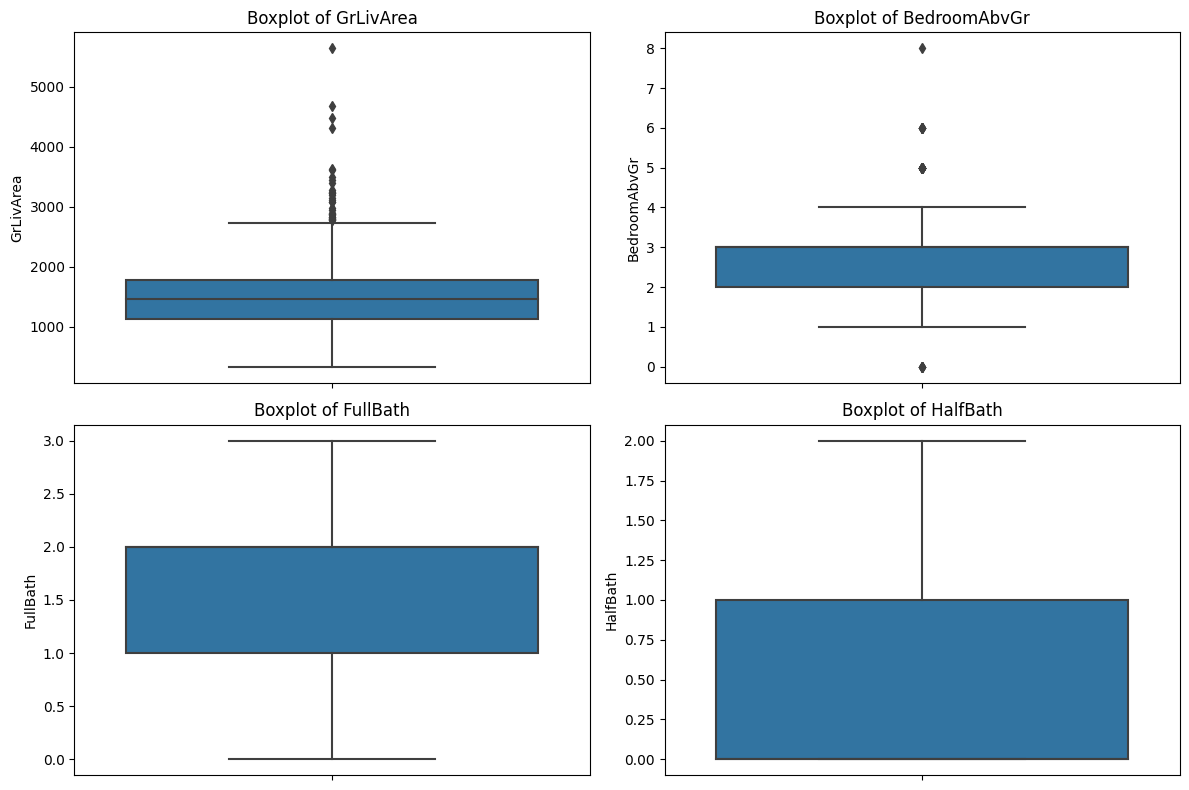

In [36]:
# Now see the same thing by using boxplot method to visualize tha outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(x.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=house_prices, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [37]:
# remove the outliers from the dataset and also check the shape
house_prices_cleaned = house_prices[~outliers_iqr]
print(f"Data shape after removing outliers: {house_prices_cleaned.shape}")


Data shape after removing outliers: (1400, 5)


In [38]:
# Now replace the values after cleaned
x = house_prices_cleaned[["GrLivArea","BedroomAbvGr","FullBath","HalfBath"]]
y = house_prices_cleaned["SalePrice"]
print("X = \n",x)
print("\nY = \n",y)

X = 
       GrLivArea  BedroomAbvGr  FullBath  HalfBath
0          1710             3         2         1
1          1262             3         2         0
2          1786             3         2         1
3          1717             3         1         0
4          2198             4         2         1
...         ...           ...       ...       ...
1455       1647             3         2         1
1456       2073             3         2         0
1457       2340             4         2         0
1458       1078             2         1         0
1459       1256             3         1         1

[1400 rows x 4 columns]

Y = 
 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1400, dtype: int64


In [39]:
# Split the data into train and test by using library
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [40]:
# Load the model
linear_Regression = LinearRegression()
linear_Regression

LinearRegression()

In [41]:
# Fit the model to train data
linear_Regression.fit(x_train,y_train)

LinearRegression()

In [42]:
# Now predict the model and view the predicted values
predict = linear_Regression.predict(x_test)
print("The Predicted Result: \n",predict)

The Predicted Result: 
 [201440.40783359 174217.9866401  143946.75518342 118694.25809976
 125377.83913296 162140.39822233 144640.76137979 115133.02455332
 232526.91782942  97581.23064587 219755.32321528 230821.33090366
 171037.94067481 143697.9227723  119711.75339874 221351.42775356
 164174.64250835 204562.75532035 103177.45479027 234960.80053343
 102413.96016006 225987.48192155 240360.34933163 136829.82950416
  97200.04306472 125308.35069912 122001.49097743 134847.36912708
 125053.6037184  205199.06303819 233745.88357629 183068.16712934
 197422.95685855 177217.94231616 153872.87576212  94274.37092417
 142860.14460657 251113.16524881 202273.39089764 124290.48224416
 288818.18978971 135737.30435772 111190.23026976 162903.51969657
 139426.0979725  183576.91477883 160486.22204954 156162.61334081
 192538.07027944 179819.00588618 125053.6037184  211303.66167611
 190699.38187171 183888.61392614 177980.69063443 230185.02318583
 237504.16562492 196856.88388649  84862.91256456 183125.4924519
 1

In [43]:
# Now compute the r2 score
r2 = r2_score(y_test, predict)
r2

0.583471687060906

In [44]:
# Make the spreate dataset of actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predict
}).reset_index(drop=True)
print("Actual vs Predicted Prices:")
print(comparison_df.head(10))

Actual vs Predicted Prices:
   Actual      Predicted
0  194700  201440.407834
1  155000  174217.986640
2  155000  143946.755183
3   91300  118694.258100
4  120000  125377.839133
5   98000  162140.398222
6  107000  144640.761380
7  110000  115133.024553
8  167500  232526.917829
9   34900   97581.230646


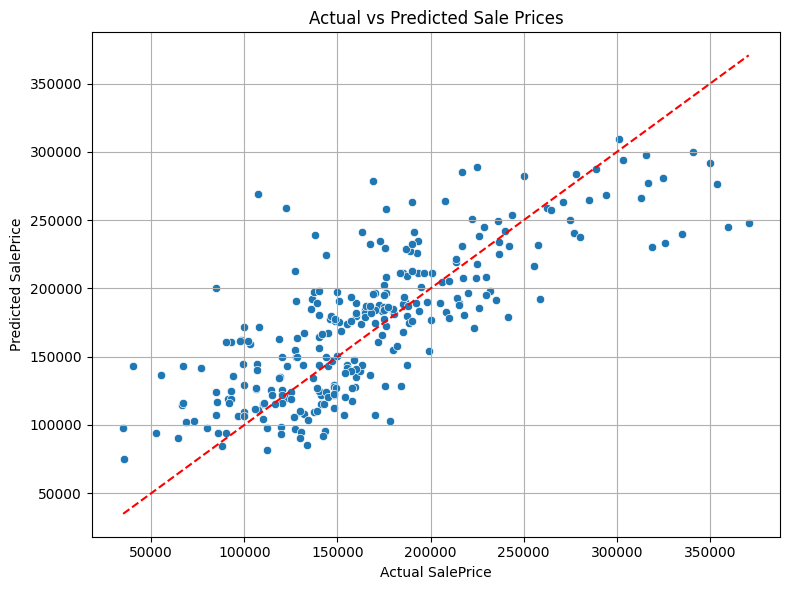

In [45]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=comparison_df['Actual'], y=comparison_df['Predicted'])
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Sale Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x500 with 0 Axes>

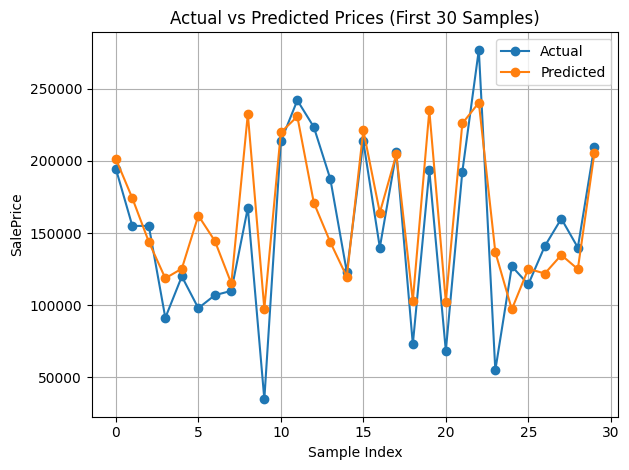

In [46]:
# Plot actual vs predicted By element wise
plt.figure(figsize=(12, 5))
comparison_df.iloc[:30].plot(kind='line', marker='o')
plt.title("Actual vs Predicted Prices (First 30 Samples)")
plt.ylabel("SalePrice")
plt.xlabel("Sample Index")
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# Read the test file and display the output
test_House_Prices = pd.read_csv("/kaggle/input/house-prices/test.csv")
test_House_Prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [48]:
# Assign the feature according to requirement 
house_prices_test = test_House_Prices[["GrLivArea","BedroomAbvGr","FullBath","HalfBath"]]
house_prices_test.head()

,GrLivArea,BedroomAbvGr,FullBath,HalfBath
0,896,2,1,0
1,1329,3,1,1
2,1629,3,2,1
3,1604,3,2,1
4,1280,2,2,0


In [49]:
# Predict the test data using over developed model
predict_test = linear_Regression.predict(house_prices_test)

house_prices_test['SalePrice'] = predict_test
house_prices_test.head()

/tmp/ipykernel_35/4212350079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices_test['SalePrice'] = predict_test


,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,896,2,1,0,119966.127223
1,1329,3,1,1,139622.773319
2,1629,3,2,1,199984.026475
3,1604,3,2,1,196804.353666
4,1280,2,2,0,191011.081019
